In [4]:
import urllib.request

In [3]:
# 불러올 url을 지정
url = 'http://www.naver.com'

In [6]:
# url 접속해서 사이트에 내용을 가져올 객체가 생성하고 변수에 저장
html = urllib.request.urlopen(url)

b'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb
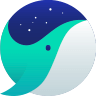
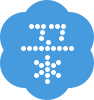

In [7]:
# 네이버에 내용을 가져옴
html.read()

In [8]:
url = 'https://cdn.hellodd.com/news/photo/202005/71835_craw1.jpg'

In [9]:
# 확장자가 같아야한다. 다른거를 해도 열리긴하지만, 맞춰주는 것이 좋다.
save_name = "고양이귀여워.jpg"

In [10]:
# urlretrieve(다운받을 이미지, 파일, 동영상 url, 무슨이름으로 저장할 지)
# jupyter notebook이 실행되고있는 폴더안에 저장된다.
urllib.request.urlretrieve(url,save_name)

('고양이귀여워.jpg', <http.client.HTTPMessage at 0x18b19cb9c70>)

In [14]:
# 크롤링 ppt 16
# 가짜 페이지를 만든다.
collect_web_page = '''

<html>
    <body>
        <h1>스크래핑 이란?</h1>
        <p>웹페이지 분석하는것</p>
        <p>원하는 부분 추출하는것</p>
    </body>
</html>

'''

In [59]:
from bs4 import BeautifulSoup

In [16]:
# BeautifulSoup(수집한 내용이 있는 변수, 원하는 내용을 봅는 객체를 만들 아이)
soup = BeautifulSoup(collect_web_page, 'html.parser')

In [17]:
soup


<html>
<body>
<h1>스크래핑 이란?</h1>
<p>웹페이지 분석하는것</p>
<p>원하는 부분 추출하는것</p>
</body>
</html>

In [20]:
soup.html.body.h1

<h1>스크래핑 이란?</h1>

In [21]:
# string을 사용해서 안에 글씨만 출력한다. string 혹은 text를 사용할 수 있다.
soup.html.body.h1.string

'스크래핑 이란?'

In [23]:
# 설정해주지않으면 첫번째의 p가 나온다.
soup.html.body.p

<p>웹페이지 분석하는것</p>

In [25]:
# 다음꺼가 나오게 하는데 현재 다음이 엔터라서 엔터가 나온다.
soup.html.body.p.next_sibling

'\n'

In [27]:
# 엔터에서 한번 더 가면 우리가 원하는 값이 나온다.
soup.html.body.p.next_sibling.next_sibling

<p>원하는 부분 추출하는것</p>

In [30]:
collect_web_page = '''
<html>
    <body>
        <h1 id = 'title1'>스크래핑이란?</h1>
        <p id = 'body1'>웹 페이지를 분석하는 것</p>
        <p>원하는 부분을 추출하는 것</p>
        <h1 id = 'title2'>스크레이핑이란!!</h1>
        <p id = 'body2'>웹 페이지를 분석하는 것~~</p>
        <p>원하는 부분을 추출하는 것이야아아아</p>
    </body>
</html>
'''

In [33]:
# 원하는 내용을 꺼낼 객체를 만들 parser
soup = BeautifulSoup(collect_web_page, "html.parser")
soup


<html>
<body>
<h1 id="title1">스크래핑이란?</h1>
<p id="body1">웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
<h1 id="title2">스크레이핑이란!!</h1>
<p id="body2">웹 페이지를 분석하는 것~~</p>
<p>원하는 부분을 추출하는 것이야아아아</p>
</body>
</html>

In [34]:
# id속성이 title2인 태그(element)를 리턴한다.
soup.find(id = 'title2')

<h1 id="title2">스크레이핑이란!!</h1>

In [35]:
soup.find(id = 'body2')

<p id="body2">웹 페이지를 분석하는 것~~</p>

In [36]:
# 크롤링 ppt 24p
collect_web_page = '''
<html>
    <body>
        <ul class = 'greet'>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class = 'reply'>
            <li>ok</li>
            <li>no</li>
            <li>suer</li>
        </ul>
    </body>
</html>
'''

In [38]:
# 내용이 새롭게 바뀌었으니 soup을 다시 만들어주어야한다.
soup = BeautifulSoup(collect_web_page, 'html.parser')

In [40]:
# 리턴받고 싶을 값은 1개, ul 태그이면서 class = 'reply'인 것
# 받고 싶은 값이 1개니깐 find를 사용한다.
# 속성은 딕셔너리로 쓴다. id도 딕셔너리로 사용 가능하다.
soup.find('ul', {'class' : 'reply'})

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>suer</li>
</ul>

In [41]:
ul = soup.find('ul', {'class' : 'reply'})
ul

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>suer</li>
</ul>

In [43]:
# 모든 li 태그를 리스트에 담아서 리턴받고 싶을 때는 findAll을 사용한다.
soup.findAll('li')

[<li>hello</li>,
 <li>bye</li>,
 <li>welcome</li>,
 <li>ok</li>,
 <li>no</li>,
 <li>suer</li>]

In [46]:
# 하나씩 꺼내고 싶을 때는 for문으로 돌린다.
for item in soup.findAll('li'):
    print('item = ', item)

item =  <li>hello</li>
item =  <li>bye</li>
item =  <li>welcome</li>
item =  <li>ok</li>
item =  <li>no</li>
item =  <li>suer</li>


In [51]:
# 태그없이 보고싶다면 text 혹은 string사용
for item in soup.findAll('li'):
    print('item.text = ', item.text)
    print('item.string = ', item.string)
    print('=' * 30)

item.text =  hello
item.string =  hello
item.text =  bye
item.string =  bye
item.text =  welcome
item.string =  welcome
item.text =  ok
item.string =  ok
item.text =  no
item.string =  no
item.text =  suer
item.string =  suer


In [52]:
# ul태그이면서 class속성이 reply인 태그에 포함된 li만 찾고싶다.
# .으로 연결해서 findAll사용
soup.find('ul', {'class' : 'reply'}).findAll('li')

[<li>ok</li>, <li>no</li>, <li>suer</li>]

In [54]:
# for문에 넣어서 돌리고 문자만 뽑아보기
for item in soup.find('ul', {'class' : 'reply'}).findAll('li'):
    print('item =', item)
    print('item.text = ', item.text)
    print('*' * 50)

item = <li>ok</li>
item.text =  ok
**************************************************
item = <li>no</li>
item.text =  no
**************************************************
item = <li>suer</li>
item.text =  suer
**************************************************


In [11]:
# 데이터 크롤링 ppt 26p
url = 'http://naver.com'

In [12]:
# url의 웹 페이지 내용을 가져올 객체가 생성되는데 변수에 지정해줘야한다.
html = urllib.request.urlopen(url)

b'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb
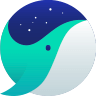
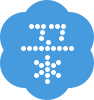

In [81]:
# 가져오는데 시간이 걸린다.
html.read()

In [13]:
# 캐시가 남아서 가끔 가져오지 않을 때도 있으니 주의하기
# 캐시가 남았으니 다시 껐다가 켜기
html = urllib.request.urlopen(url)

In [14]:
# 딱 한번만 가져오는데 이미 read()를 사용해서 다시 가져올 수가 없다.
# 다시 한번 객체를 만들어서 지정해주어야한다.
soup = BeautifulSoup(html, 'html.parser')


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
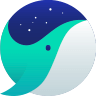
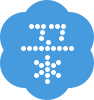

In [15]:
soup

In [16]:
soup.find('ul', {'class' : 'type_fix'})

<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>
</ul>

In [17]:
soup.find('ul', {'class' : 'type_fix'}).findAll('li')

[<li class="nav_item">
 <a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
 </li>,
 <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>,
 <li class="nav_item">
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
 </li>]

In [20]:
# li안에 있는게 아니면 추출할 수 없다.
for item in soup.find('ul', {'class' : 'type_fix'}).findAll('li'):
    print('item.string =', item.string)
    print('=' * 50)

item.string = None
item.string = 카페
item.string = 블로그
item.string = 지식iN
item.string = 쇼핑
item.string = Pay
item.string = None


In [19]:
# string에서 None으로 나온것들이 text는 나온다. 첫번째와 마지막줄에 엔터가 있음으로 string은 나오지 않는다.
for item in soup.find('ul', {'class' : 'type_fix'}).findAll('li'):
    print('item.text =', item.text)
    print('=' * 50)

item.text = 
메일

item.text = 카페
item.text = 블로그
item.text = 지식iN
item.text = 쇼핑
item.text = Pay
item.text = 
TV



In [24]:
compare_string_text = '''
            <li>안녕</li>
            <li>
                또 만나
            </li>
            <li><a href = 'http://naver.com'>반가워</a></li>
            <li>
                <a href = 'http://naver.com'>고마워</a>
            </li>
            <li><a href = 'http://naver.com'>good</a><a href = 'http://naver.com'>bad</a></li>
            <li>
                <a href = 'http://naver.com'>good2</a>
                <a href = 'http://naver.com'>bad2</a>
            </li>
'''

In [25]:
soup2 = BeautifulSoup(compare_string_text, 'html.parser')

In [26]:
for item in soup2.findAll('li'):
    print('item.text =', item.text)
    print('item.string =', item.string)
    print('*' * 50)

item.text = 안녕
item.string = 안녕
**************************************************
item.text = 
                또 만나
            
item.string = 
                또 만나
            
**************************************************
item.text = 반가워
item.string = 반가워
**************************************************
item.text = 
고마워

item.string = None
**************************************************
item.text = goodbad
item.string = None
**************************************************
item.text = 
good2
bad2

item.string = None
**************************************************


In [28]:
# 데이터 크롤링 ppt 36p
# url은 공백이 존재하면 안된다.
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210421'

In [29]:
html = urllib.request.urlopen(url)

In [30]:
soup = BeautifulSoup(html, 'html.parser')

In [31]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210421" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [32]:
# class가 'title'인 부분을 find로 찾는다.
titleOfMovie1 = soup.findAll('td', {'class' : 'title'})

In [33]:
titleOfMovie1

[<td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196843" title="극장판 바이올렛 에버가든">극장판 바이올렛 에버가든</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=194334" title="부활: 그 증거">부활: 그 증거</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=14448" title="패왕별희 디 오리지널">패왕별희 디 오리지널</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189075" title="자산어보">자산어보</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10670" title="천녀유혼">천녀유혼</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn

In [35]:
# for문을 돌면서 문자만 출력하기
for item in soup.findAll('td', {'class' : 'title'}):
    print('item.text =', item.text)
    print('=' * 50)

item.text = 

극장판 바이올렛 에버가든


item.text = 

부활: 그 증거


item.text = 

패왕별희 디 오리지널


item.text = 

극장판 귀멸의 칼날: 무한열차편


item.text = 

소울


item.text = 

자산어보


item.text = 

천녀유혼


item.text = 

플립


item.text = 

러빙 빈센트


item.text = 

해피 투게더


item.text = 

영웅본색


item.text = 

파수꾼


item.text = 

라야와 마지막 드래곤


item.text = 

명탐정 코난: 비색의 탄환


item.text = 

영웅본색 2


item.text = 

남매의 여름밤


item.text = 

더 박스


item.text = 

시


item.text = 

러브 액츄얼리


item.text = 

중경삼림


item.text = 

아무도 모른다


item.text = 

이별의 아침에 약속의 꽃을 장식하자


item.text = 

초록물고기


item.text = 

화양연화


item.text = 

소공녀


item.text = 

찬실이는 복도 많지


item.text = 

벌새


item.text = 

건축학개론


item.text = 

노바디 


item.text = 

늑대소년


item.text = 

플로리다 프로젝트


item.text = 

세자매


item.text = 

블루 재스민


item.text = 

아비정전


item.text = 

문영


item.text = 

너의 췌장을 먹고 싶어


item.text = 

아틱


item.text = 

패터슨


item.text = 

고질라 VS. 콩


item.text = 

팅커 테일러 솔저 스파이


item.text = 

테넷


item.text = 

문라이즈 킹덤


item.text = 

더 테

In [36]:
# 출력하면 엔터까지 다 보이게 출력이니깐 문자열에서 공백과 탭을 지워주는 strip을 사용한다.
for item in soup.findAll('td', {'class' : 'title'}):
    print('item.text.strip =', item.text.strip())
    print('*' * 50)

item.text.strip = 극장판 바이올렛 에버가든
**************************************************
item.text.strip = 부활: 그 증거
**************************************************
item.text.strip = 패왕별희 디 오리지널
**************************************************
item.text.strip = 극장판 귀멸의 칼날: 무한열차편
**************************************************
item.text.strip = 소울
**************************************************
item.text.strip = 자산어보
**************************************************
item.text.strip = 천녀유혼
**************************************************
item.text.strip = 플립
**************************************************
item.text.strip = 러빙 빈센트
**************************************************
item.text.strip = 해피 투게더
**************************************************
item.text.strip = 영웅본색
**************************************************
item.text.strip = 파수꾼
**************************************************
item.text.strip = 라야와 마지막 드래곤
**************************************************

In [37]:
a = '\n\n\t문자열\n\n\n'

In [38]:
a

'\n\n\t문자열\n\n\n'

In [39]:
print(a)



	문자열





In [54]:
# 평점 구하기
points = soup.findAll('td', {'class' : 'point'})

In [55]:
points

[<td class="point">9.48</td>,
 <td class="point">9.33</td>,
 <td class="point">9.32</td>,
 <td class="point">9.31</td>,
 <td class="point">9.30</td>,
 <td class="point">9.29</td>,
 <td class="point">9.29</td>,
 <td class="point">9.27</td>,
 <td class="point">9.22</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.18</td>,
 <td class="point">9.15</td>,
 <td class="point">9.00</td>,
 <td class="point">8.97</td>,
 <td class="point">8.95</td>,
 <td class="point">8.94</td>,
 <td class="point">8.93</td>,
 <td class="point">8.93</td>,
 <td class="point">8.93</td>,
 <td class="point">8.87</td>,
 <td class="point">8.86</td>,
 <td class="point">8.83</td>,
 <td class="point">8.78</td>,
 <td class="point">8.78</td>,
 <td class="point">8.75</td>,
 <td class="point">8.75</td>,
 <td class="point">8.67</td>,
 <td class="point">8.67</td>,
 <td class="point">8.65</td>,
 <td class="point">8.64</td>,
 <td class="point">8.55</td>,
 <td class="point">8.48</td>,
 <td class

In [63]:
# 리스트안에 저장된 데이터(제목 수)
len(titleOfMovie1)

50

In [62]:
# 리스트안에 저장된 데이터(평점 수)
len(points)

50

In [69]:
# 제목과 별점을 같이 나타내기
# 둘 다 50개의 갯수로 range(50)으로 돌리기
for i in range(50):
    print('i=', i)
    print('title_of_movie1[i].text.strip = ', titleOfMovie1[i].text.strip())
    print('points[i].text = ', points[i].text)
    print('=' * 70)

i= 0
title_of_movie1[i].text.strip =  극장판 바이올렛 에버가든
points[i].text =  9.48
i= 1
title_of_movie1[i].text.strip =  부활: 그 증거
points[i].text =  9.33
i= 2
title_of_movie1[i].text.strip =  패왕별희 디 오리지널
points[i].text =  9.32
i= 3
title_of_movie1[i].text.strip =  극장판 귀멸의 칼날: 무한열차편
points[i].text =  9.31
i= 4
title_of_movie1[i].text.strip =  소울
points[i].text =  9.30
i= 5
title_of_movie1[i].text.strip =  자산어보
points[i].text =  9.29
i= 6
title_of_movie1[i].text.strip =  천녀유혼
points[i].text =  9.29
i= 7
title_of_movie1[i].text.strip =  플립
points[i].text =  9.27
i= 8
title_of_movie1[i].text.strip =  러빙 빈센트
points[i].text =  9.22
i= 9
title_of_movie1[i].text.strip =  해피 투게더
points[i].text =  9.20
i= 10
title_of_movie1[i].text.strip =  영웅본색
points[i].text =  9.18
i= 11
title_of_movie1[i].text.strip =  파수꾼
points[i].text =  9.18
i= 12
title_of_movie1[i].text.strip =  라야와 마지막 드래곤
points[i].text =  9.15
i= 13
title_of_movie1[i].text.strip =  명탐정 코난: 비색의 탄환
points[i].text =  9.00
i= 14
title_of_movie1[i

In [74]:
# zip을 사용해서 출력하기
for title, star in zip(titleOfMovie1, points):
    print('title.text.strip =', title.text.strip() , 'star.text.strip() =', star.text.strip())
    print('*' * 80)

title.text.strip = 극장판 바이올렛 에버가든 star.text.strip() = 9.48
********************************************************************************
title.text.strip = 부활: 그 증거 star.text.strip() = 9.33
********************************************************************************
title.text.strip = 패왕별희 디 오리지널 star.text.strip() = 9.32
********************************************************************************
title.text.strip = 극장판 귀멸의 칼날: 무한열차편 star.text.strip() = 9.31
********************************************************************************
title.text.strip = 소울 star.text.strip() = 9.30
********************************************************************************
title.text.strip = 자산어보 star.text.strip() = 9.29
********************************************************************************
title.text.strip = 천녀유혼 star.text.strip() = 9.29
********************************************************************************
title.text.strip = 플립 star.text.strip() = 9.27
************

In [75]:
# zip을 볼려면 list안에 넣으면 볼 수 있다.
list(zip(titleOfMovie1, points))

[(<td class="title">
  <div class="tit5">
  <a href="/movie/bi/mi/basic.nhn?code=196843" title="극장판 바이올렛 에버가든">극장판 바이올렛 에버가든</a>
  </div>
  </td>,
  <td class="point">9.48</td>),
 (<td class="title">
  <div class="tit5">
  <a href="/movie/bi/mi/basic.nhn?code=194334" title="부활: 그 증거">부활: 그 증거</a>
  </div>
  </td>,
  <td class="point">9.33</td>),
 (<td class="title">
  <div class="tit5">
  <a href="/movie/bi/mi/basic.nhn?code=14448" title="패왕별희 디 오리지널">패왕별희 디 오리지널</a>
  </div>
  </td>,
  <td class="point">9.32</td>),
 (<td class="title">
  <div class="tit5">
  <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
  </div>
  </td>,
  <td class="point">9.31</td>),
 (<td class="title">
  <div class="tit5">
  <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
  </div>
  </td>,
  <td class="point">9.30</td>),
 (<td class="title">
  <div class="tit5">
  <a href="/movie/bi/mi/basic.nhn?code=189075" title="자산어보">자산어보</a>
  </div>
  </td>,
  <td

In [77]:
lst1 = ['a','b','c']
lst1

['a', 'b', 'c']

In [78]:
lst2 = [100, 200, 300]
lst2

[100, 200, 300]

In [79]:
# 여러개의 리스트를 합칠 때는 zip을 사용한다.
zip(lst1, lst2)

In [80]:
# 출력을 위해서는 list 함수에 넣어야한다.
list(zip(lst1, lst2))

[('a', 100), ('b', 200), ('c', 300)]

In [82]:
for data1, data2 in zip(lst1, lst2):
    print('data1 = ', data1, 'data2 =', data2)

data1 =  a data2 = 100
data1 =  b data2 = 200
data1 =  c data2 = 300
